In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set default style for plots
sns.set(style='whitegrid')


In [ ]:
# Load the dataset
data = pd.read_csv(r"/content/NIFTY 50_daily_data.csv")
data


,date,open,high,low,close,volume
0,2015-01-01 00:00:00,8272.79,8294.70,8248.75,8284.00,0
1,2015-01-02 00:00:00,8288.70,8410.60,8288.70,8395.40,0
2,2015-01-05 00:00:00,8407.95,8445.60,8363.90,8378.40,0
3,2015-01-06 00:00:00,8325.29,8327.85,8111.35,8127.30,0
4,2015-01-07 00:00:00,8118.65,8151.20,8065.45,8102.10,0
...,...,...,...,...,...,...
2501,2025-02-03 00:00:00,23319.35,23381.60,23222.00,23361.05,0
2502,2025-02-04 00:00:00,23509.90,23762.75,23423.15,23739.25,0
2503,2025-02-05 00:00:00,23801.75,23807.30,23680.45,23696.30,0
2504,2025-02-06 00:00:00,23761.95,23773.55,23556.25,23603.35,0


In [ ]:
data.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
data


,date,open,high,low,close,volume
0,2015-01-01 00:00:00,8272.79,8294.70,8248.75,8284.00,0
1,2015-01-02 00:00:00,8288.70,8410.60,8288.70,8395.40,0
2,2015-01-05 00:00:00,8407.95,8445.60,8363.90,8378.40,0
3,2015-01-06 00:00:00,8325.29,8327.85,8111.35,8127.30,0
4,2015-01-07 00:00:00,8118.65,8151.20,8065.45,8102.10,0
...,...,...,...,...,...,...
2501,2025-02-03 00:00:00,23319.35,23381.60,23222.00,23361.05,0
2502,2025-02-04 00:00:00,23509.90,23762.75,23423.15,23739.25,0
2503,2025-02-05 00:00:00,23801.75,23807.30,23680.45,23696.30,0
2504,2025-02-06 00:00:00,23761.95,23773.55,23556.25,23603.35,0


In [ ]:
data.isnull().sum()


,0
date,0
open,0
high,0
low,0
close,0
volume,0


In [ ]:
data.dtypes


,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64


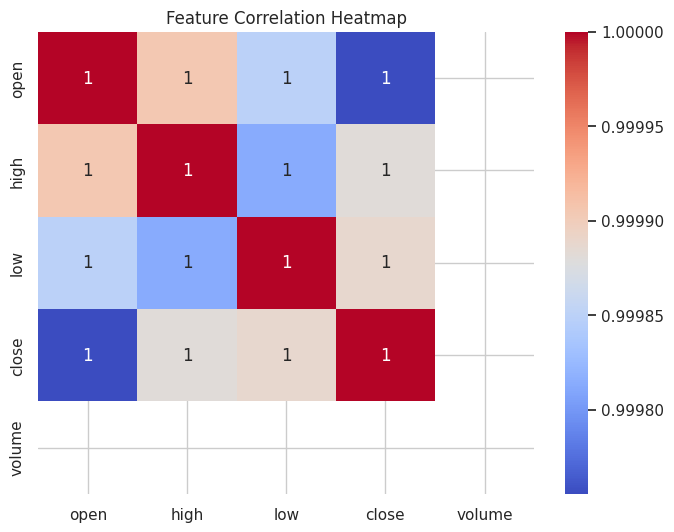

In [ ]:
data_numeric = data.drop(['date'], axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Define input and output
features = ['open', 'high', 'low', 'volume']
X = data[features]
y = data['close']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

# Combine predictions and actuals into a DataFrame
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results.head()


,Actual,Predicted
0,19680.60,19642.898406
1,8542.90,8617.069184
2,11588.35,11644.730681
3,18972.10,18965.309228
4,15691.40,15733.099789


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 2097.88
R² Score: 0.9999


In [ ]:
# Example: Predict with new data [open, high, low, volume]
new_data = np.array([[8118.65,8151.20,8065.45,0]])
new_data_scaled = scaler.transform(new_data)
predicted_close = model.predict(new_data_scaled)
print(f"Predicted Close Price: {predicted_close[0]:.2f}")


Predicted Close Price: 8106.71


In [ ]:
import pickle

# Save the model
with open("nifty_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
with open("nifty_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
